<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Machine Learning with Tree-based Gradient Boosting Regressor Methods

### Tree-based Gradient Boosting for Subsurface Modeling in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### PGE 383 Exercise: Tree-based Gradient Boosting Regressors for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of tree-based gradient boosting for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about tree-based gradient boosting.  

#### Boosting Methods

Boosting applies mulitple week learners to build a stronger learner

* a weak learner is one that offers predictions just marginally better than random selection

I'll explain the method with words and then with equations.

* build a simple model with a high error rate, the model can be be quite inaccurate, but moves in the correct direction

* calculate the error from the model

* fit another model to the error

* calculate the error from this addition of the first and second model

* repeat until the desired accuracy is obtained or some other stopping criteria

The general workflow for predicting $Y$ from $X_1,\ldots,X_m$ is:

* build a week learner to predict $Y$ from $X_1,\ldots,X_m$, $\hat{F}_k(X)$ from the training data $x_{i,j}$.

* loop over number of desired estimators, $k = 1,\ldots,K$

    1. calculate the residuals at the the training data, $h_k(x_{i}) = y_i - \hat{F}_k(x_{i})$

    2. fit another week learner to predict $h_k$ from $X_1,\ldots,X_m$, $\hat{F}_k(X)$ from the training data $x_{i,j}$.

We have a hiearchy of simple $K$ models. 

* each model builds on the previous to improve the accuracy

Our regression estimator is the summation over the $K$ simple models.

\begin{equation}
\hat{Y} =\sum_{k=1}^{K} F_k(X_1,\ldots,X_m)
\end{equation}

#### Gradient Boosting Methods

If you look at the previous method, it becomes clear that it could be mapped to a gradient descent problem

At each step, $k$, a model is being fit, then the error is calculated, $h_k(X_1,\ldots,X_m).

We can assign a loss function

\begin{equation}
L\left(y,F(X)\right) = \frac{\left(y - F(X)\right)^2}{2}
\end{equation}

So we want to minimize the $\ell2$ loos function:

\begin{equation}
J = \sum_{i=1}^{n} L\left(y_i, F_k(X) \right)
\end{equation}

by adjusting our model result over our training data $F(x_1), F(x_2),\ldots,F(x_n)$.

We can take the partial derivative of the error vs. our model. 

\begin{equation}
\frac{\partial J}{\partial F(x_i)} = F(x_i) - y_i
\end{equation}

We can interpret the residuals as negative gradients.

\begin{equation}
y_i - F(x_i) = -1 \frac{\partial J}{\partial F(x_i)} 
\end{equation}

So now we have  a gradient descent problem:

\begin{equation}
F_{k+1}(X_i) = F_k(X_i) + h(X_i)
\end{equation}

\begin{equation}
F_{k+1}(X_i) = F_k(X_i) + y_i - F_k(X_i)
\end{equation}

\begin{equation}
F_{k+1}(X_i) = F_k(X_i) - 1 \frac{\partial J}{\partial F_k(X_i)}
\end{equation}

Of the general form:

\begin{equation}
\phi_{k+1} = \phi_k - \rho \frac{\partial J}{\partial \phi_k}
\end{equation}

where $phi_k$ is the current state, $\rho$ is the learning rate, $J$ is the loss function, and $\phi_{k+1}$ is the next state of our estimator.

If we consider our residual at training data to be a gradient then we are performing gradient descent.  

* fitting a series of models to negative gradients

By approaching the problem as a gradient decent problem we are able to apply a variety of loss functions

* $\ell2$ is our $\frac{\left(y - F(X)\right)^2}{2}$ is practical, but is not robust with outliers

\begin{equation}
- 1 \frac{\partial J}{\partial F_k(X_i)} = y_i - F_k(X_i)
\end{equation}

* $\ell1$ is our $|y - F(X)|$ is more robust with outliers

\begin{equation}
- 1 \frac{\partial J}{\partial F_k(X_i)} = sign(y_i - F_k(X_i))
\end{equation}

* there are others like Huber Loss

#### Classification

The response is a finite set of possible catergories.  

* For each training data the truth is 100% probability in the observed category and 0% otherwise

* Estimate the probability of each category with the a decision tree

* Use a measure of difference between the true and estimated distributions as the loss function to minimize

#### Tree-based Boosting Methods

Machine learning method for supervised learning for classification and regression analysis. Here are some key aspects of random forest.

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Supervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Hiearchical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** – any combination of predictors only belongs to a single region, $R_j$

* **exhaustive** – all combinations of predictors belong a region, $R_j$, regions cover entire feature space (range of the variables being considered)

For every observation in a region, $R_j$, we use the same prediction, $\hat{Y}(R_j)$    

For example predict production, $\hat{Y}$, from porosity, ${X_1}$

* given the data within a mD feature space, $X_1,\ldots,X_m$, find that boundary maximizes the gap between the two categories

* new cases are classified based on where they fall relative to this boundary 
 
**Proceedure for Tree Construction**

The tree is constructed from the top down.  We begin with a sigle region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

\begin{equation}
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
\end{equation}

* **Stopping Criteria** is typically based on minimum number of training data in each region for a robust estimation and / or minimum reduction in RSS for the next split 

**Interpretability**

Compared to decision trees, the ensemble methods have reduced interpretability.  One tool to improve model interpretability is feature importance.

We calculate variable importance through calculating the average of:

* residual sum of square reduction for all splits involving each predictor feature for regression

* the decrease in the Gini index for all splits involving each predictor feature for classification

Both are standardized to sum to 1.0 over the features.

##### Applications to Subsurface Modeling

We will predict unconventional well production from a single petrophysical and geomechanical predictor feature

##### Why Cover Ensemble Methods with Tree-based Gradient Boosting?

Here's some thoughts:

* build on from easy to understand decision trees
* demonstrate reduction in model variance through an ensemble approach
* random forest is quite powerful and is a top performing machine learning method in various types of problems 

#### Workflow Goals

Learn the basics of ensemble tree methods in python to segment facies given petrophysical properties. This includes:

* Loading and visualizing sample data
* Trying out bagging tree and random forest 
* Test and observe the model behavoir and prove concepts

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - 12_sample_data.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/12_sample_data.csv).

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

#### Load the required libraries

The following code loads the required libraries.

In [17]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn import tree                                    # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                              # for accessing tree information
from sklearn import metrics                                 # measures to check our models
from sklearn.tree import export_graphviz                    # graphical visualization of trees
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0

from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.tree import DecisionTreeRegressor              # decision tree method
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor      # tree-based gradient boosting

import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
import geostatspy.GSLIB as GSLIB                            # geostatistics and spatial methods
cmap = plt.cm.inferno                                       # because it is awesome

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization and test our regression models. 

In [48]:
def plot_corr(dataframe,size=10):                           # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0,cmap=cmap)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # predict with our trained model over the mesh
    Z = Z.reshape(xx.shape)
    plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="white")
    im = plt.imshow(Z,interpolation = None,aspect = "auto",extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap = cmap)
    plt.title(title)                                       # add the labels
    plt.xlabel(xfeature.name); plt.ylabel(yfeature.name)
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    cbar = plt.colorbar(im, orientation = 'vertical')      # add the color bar
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return Z

def check_model(model,xfeature,yfeature,response,title):    # plots the estimated vs. the actual  
    predict_train = model.predict(np.c_[xfeature,yfeature])
    plt.scatter(response,predict_train,s=None, c='red',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, edgecolors="black")
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim(0,7000); plt.ylim(0,7000)
    plt.arrow(0,0,7000,7000,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE = metrics.mean_squared_error(response,predict_train)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    print('Mean Squared Error on Training = ', round(MSE,2),', Variance Explained =', round(Var_Explained,2),'Cor =', round(cor,2))

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [49]:
#os.chdir("c:/PGE383")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

First copy the "unconv_MV.csv" comma delimited file from https://github.com/GeostatsGuy/GeoDataSets to your working directory, then run this command to read the file into a DataFrame object (part of Pandas package).  

In [106]:
#my_data = pd.read_csv("unconv_MV.csv")                      # load the comma delimited data file
my_data = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the data from Dr. Pyrcz's GitHub respository

#### Optional - Add Random Error to the Response Feature

In [107]:
std_error = 1000
my_data['Production'] = my_data['Production'] + np.random.normal(loc = 0.0,scale=std_error,size=len(my_data)) # add noise

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [108]:
my_data.head(n=13)                                          # preview the first 13 rows of the DataFrame

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,-921.815473
1,2,15.34,1.65,2.60,31.88,1.37,1.79,46.481151
2,3,20.45,2.02,3.13,63.67,1.79,2.53,2893.151158
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1197.328928
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5267.326817
5,6,19.47,2.04,2.73,54.37,1.42,2.12,4920.977880
6,7,12.70,1.30,3.70,43.03,0.45,1.95,2508.692651
7,8,14.15,1.23,2.53,39.43,0.79,1.54,1839.090517
8,9,16.18,1.34,3.45,45.79,0.56,1.95,4733.431538
9,10,20.51,2.48,2.78,28.99,1.78,2.24,2388.351506


Let's remove the well index and check the summary summary statistics.  We will also take the first 300 samples.

* the samples are random order so we are randomly sampling our data

In [109]:
my_data = my_data.iloc[:300,1:8]                            # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,300.0,14.665567,3.067537,5.400000,12.567500,14.600000,16.705000,23.850000
LogPerm,300.0,1.383500,0.413808,0.240000,1.140000,1.365000,1.660000,2.570000
AI,300.0,3.008800,0.583795,1.210000,2.610000,3.000000,3.392500,4.700000
Brittle,300.0,50.542900,15.192652,-10.500000,39.972500,49.635000,59.472500,93.470000
TOC,300.0,0.963533,0.522031,-0.260000,0.630000,0.940000,1.295000,2.710000
VR,300.0,1.982000,0.318500,0.900000,1.807500,2.010000,2.170000,2.840000
Production,300.0,2143.609275,1685.399993,-1608.905267,1103.359162,1927.840903,3180.454352,9995.747038


It is good that we checked the summary statistics, because we have some negative values for brittleness and total organic carbon. The is physically imposible.  The values must be in error. We know the lowest possible values are 0.0, so we will truncate on 0.0.  We use the *get_numerical_data()* DataFrame member function to get a shallow copy of the data from the DataFrame.  Since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  This allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [110]:
num = my_data._get_numeric_data()                           # get the numerical values
num[num < 0] = 0                                            # truncate negative values to 0.0
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,300.0,14.665567,3.067537,5.40,12.567500,14.600000,16.705000,23.850000
LogPerm,300.0,1.383500,0.413808,0.24,1.140000,1.365000,1.660000,2.570000
AI,300.0,3.008800,0.583795,1.21,2.610000,3.000000,3.392500,4.700000
Brittle,300.0,50.577900,15.063097,0.00,39.972500,49.635000,59.472500,93.470000
TOC,300.0,0.968100,0.512586,0.00,0.630000,0.940000,1.295000,2.710000
VR,300.0,1.982000,0.318500,0.90,1.807500,2.010000,2.170000,2.840000
Production,300.0,2196.016153,1601.110208,0.00,1103.359162,1927.840903,3180.454352,9995.747038


This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Feature Ranges

Let's set predictor and response feature ranges for plotting.

In [111]:
pormin = 5.0; pormax = 25.0                                 # set minumums and maximums for visualization 
brittlemin = 0.0; brittlemax = 100.0
prodmin = 0.0; prodmax = 8000.0

#### Calculate the correlation matrix 

For multivariate analysis it is a good idea to check the correlation matrix.  We can calculate it and view it in the console with these commands.

In [112]:
corr_matrix = np.corrcoef(my_data, rowvar = False)
print(np.around(corr_matrix,2))                             # print the correlation matrix to 2 decimals

[[ 1.    0.81 -0.53 -0.23  0.73  0.07  0.53]
 [ 0.81  1.   -0.37 -0.11  0.53  0.01  0.43]
 [-0.53 -0.37  1.    0.21 -0.52  0.54 -0.26]
 [-0.23 -0.11  0.21  1.   -0.25  0.26 -0.14]
 [ 0.73  0.53 -0.52 -0.25  1.    0.31  0.43]
 [ 0.07  0.01  0.54  0.26  0.31  1.    0.09]
 [ 0.53  0.43 -0.26 -0.14  0.43  0.09  1.  ]]


Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

Let's use our function declared above to make a graphical correlation matrix visualization.  This may inprove our ability to spot features.  It relies on the built in correlation matrix method with Numpy DataFrames and MatPlotLib for plotting.

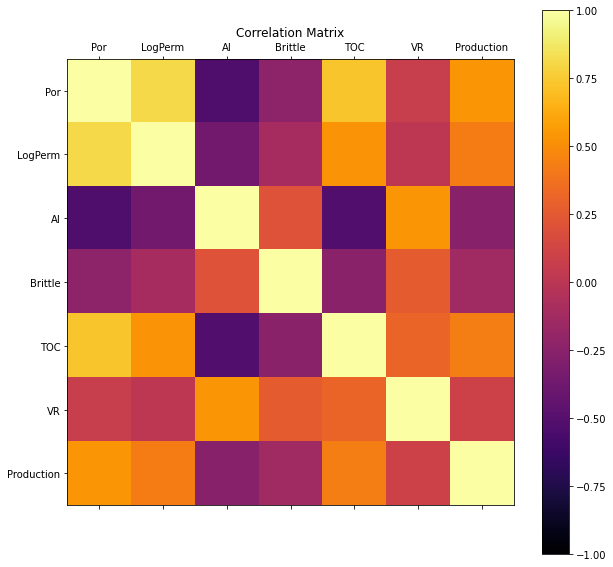

In [113]:
plot_corr(my_data,10)                                       # using our correlation matrix visualization function
plt.show()

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coeffficients are limited to degree of linear correlations.  For more complete information, let's look at the matrix scatter plot from the Pandas package. 

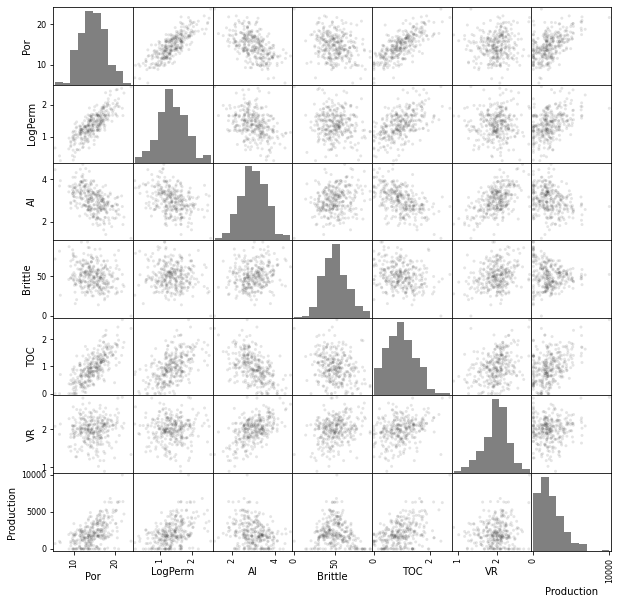

In [114]:
pd_plot.scatter_matrix(my_data, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(10, 10),color = 'black', hist_kwds={'color':['grey']})
plt.show()

#### Working with Only Two Features

Let's simplify the problem to 2 feature), Porosity and Brittleness to predict Production rate.  We will also reduce the number of wells from to 300 and withhold 50 for testing (simple jackknife cross validation). By working with only 2 features, it is very easy to visualize the segmentation of the feature space (it is only 2D and can be shown compleltely on a single plot).

In [115]:
my_data_subset = my_data.iloc[:250,[0,3,6]]                 # extract just por, brittle and prod with 300 training samples
my_data_test_subset = my_data.iloc[250:,[0,3,6]]            # extract just por, brittle and prod with 700 testing samples
my_data_subset.describe().transpose()                       # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,250.0,14.767600,2.971758,6.48,12.790000,14.620000,16.680000,23.850000
Brittle,250.0,50.875200,15.288438,0.00,39.917500,49.635000,59.425000,93.470000
Production,250.0,2148.178375,1550.069227,0.00,1040.180128,1909.440539,3008.028795,6822.178769


Let's look at the summary statistics for our test dataset.

In [116]:
my_data_test_subset.describe().transpose()                       # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,50.0,14.15540,3.496075,5.40,11.490000,14.205000,17.00500,21.740000
Brittle,50.0,49.09140,13.930762,15.61,40.587500,50.525000,58.98250,72.010000
Production,50.0,2435.20504,1833.887356,0.00,1236.105937,2064.996604,3495.04736,9995.747038


Let's first check the univariate statistics of Porosity, Brittleness and Producton.

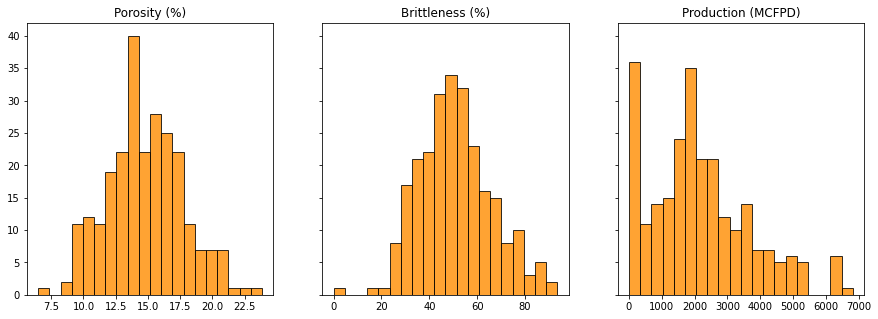

In [117]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5)) # plot histograms
ax1.hist(my_data_subset["Por"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax1.set_title('Porosity (%)')
ax2.hist(my_data_subset["Brittle"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax2.set_title('Brittleness (%)')
ax3.hist(my_data_subset["Production"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax3.set_title('Production (MCFPD)')
# prod_min = round(min(my_data_subset["Production"]),0); prod_max = round(max(my_data_subset["Production"]),0)
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production for our testing and training data sets.

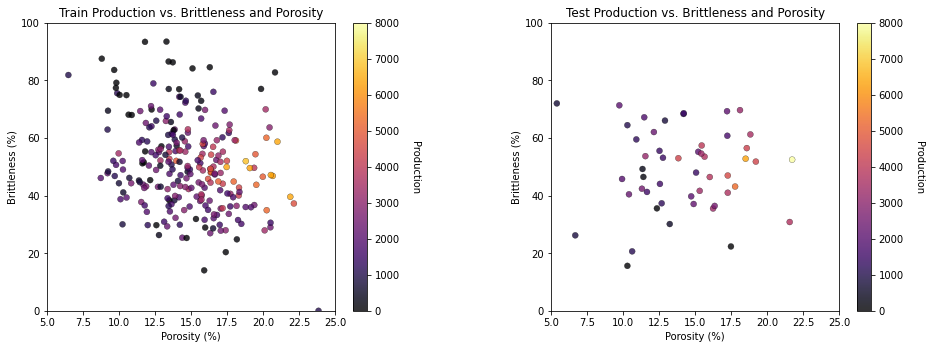

In [118]:
plt.subplot(121)                                  # plot the training data
im = plt.scatter(my_data_subset["Por"],my_data_subset["Brittle"],s=None, c=my_data_subset["Production"], marker=None, cmap=cmap, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Train Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(pormin,pormax);plt.ylim(brittlemin,brittlemax)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(122)                                # plot the training data
im = plt.scatter(my_data_test_subset["Por"],my_data_test_subset["Brittle"],s=None, c=my_data_test_subset["Production"], marker=None, cmap=cmap, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Test Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(pormin,pormax);plt.ylim(brittlemin,brittlemax)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)
 
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.4, hspace=0.3)
plt.show()

This problem looks complicated and could not be modeled with simple linear regression.  It appears there is a sweet spot for Brittleness and increasing Porosity is always beneficial for Production.

#### Seperate Predictor and Response Feature DataFrames

The input for the tree-based boosting is 2 DataFrames, one with the predictor features and the other with the response feature.  We will use the DataFrame member function copy() to copy the respective columns to 2 new DataFrames.  

In [119]:
predictors = my_data_subset[['Por','Brittle']].copy()       # make a new DataFrame with predictor features for training
response = my_data_subset[['Production']].copy()            # make a new DataFrame with responses features for training
predictors_test = my_data_test_subset[['Por','Brittle']].copy() # make a new DataFrame with predictor features for testing
response_test = my_data_test_subset[['Production']].copy()  # make a new DataFrame with responses for testing

#### Tree-based Boosting

To perform tree-based boosting we will:

1. set the hyperparameters for our model

```python
params = {
    'loss': 'ls'                                            # L2 Norm - least squares
    'n_estimators': 1,                                      # number of trees
    'max_depth': 1,                                         # maximum depth per tree
    'learning_rate': 1,                                     
    'criterion': 'mse'                                      # tree construction criterion
}
```

2. instantiate the model

```python
boost_tree = GradientBoostingRegressor(**params)

```

3. train the the model

```python
boot_tree.fit(X = predictors, y = response)
```

6. visualize the model result over the feature space (easy to do as we have only 2 predictor features)

#### Demonstration of Boosting

For demonstration let's set the number of trees to 1 and run 6 the tree-based boosting regressors.  

* each tree only has a single split, called decision stumps. This will prevent interaction between the predictor features and be highly interpretable

You should be able to observe the additive nature of the trees

* recall the estimate is the summation of multiple trees

* since we are working with fitting a gradient after the first tree, we can have negative and positive estimates 

* in this example we can see some production estimates that are actually negative

Complete of 6:  1,  2,  3,  4,  5,  6,  

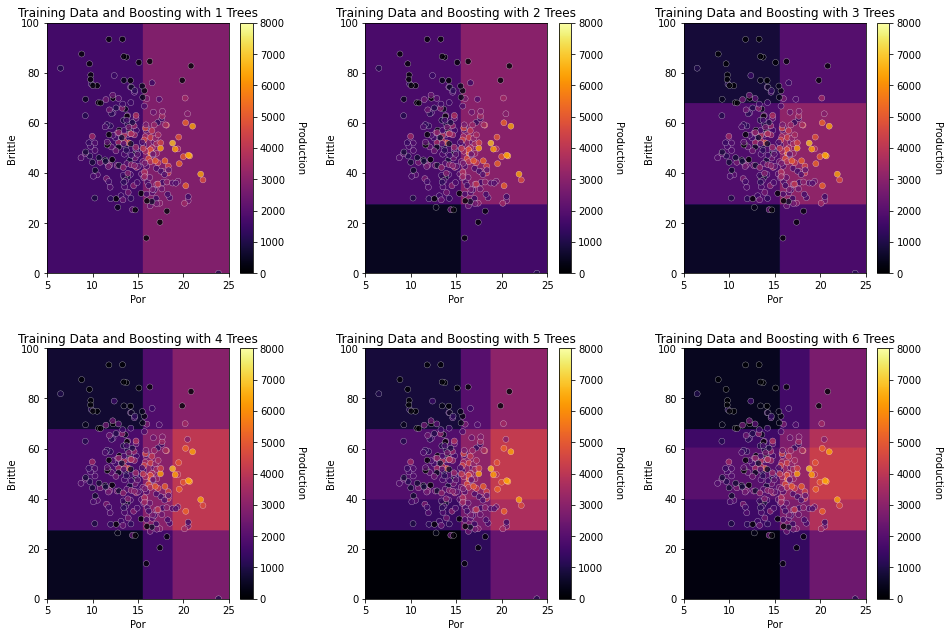

In [120]:
import warnings
warnings.filterwarnings('ignore')                           # suppress warnings

params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 1,                       
    'learning_rate': 0.8,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}
                                           
num_trees = np.linspace(1,6,6)                              # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = predictors, y = response)
    score.append(boosting_models[index-1].score(X = predictors_test, y = response_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Boosting with ' + str(int(num_tree)) + ' Trees'))
    print(str(index)+ ', ', end =" ") 
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Notice that there is significant misfit with the data 

* we have only used up to 6 decision stumps (1 decision tree) 

Let's check the cross validation results with the withheld testing data.

Complete of 6:  Mean Squared Error on Training =  2573268.65 , Variance Explained = 0.26 Cor = 0.47
1,  Mean Squared Error on Training =  2488673.38 , Variance Explained = 0.26 Cor = 0.49
2,  Mean Squared Error on Training =  2255302.42 , Variance Explained = 0.34 Cor = 0.56
3,  Mean Squared Error on Training =  1945960.84 , Variance Explained = 0.43 Cor = 0.64
4,  Mean Squared Error on Training =  1815302.17 , Variance Explained = 0.47 Cor = 0.67
5,  Mean Squared Error on Training =  1700530.38 , Variance Explained = 0.51 Cor = 0.7
6,  

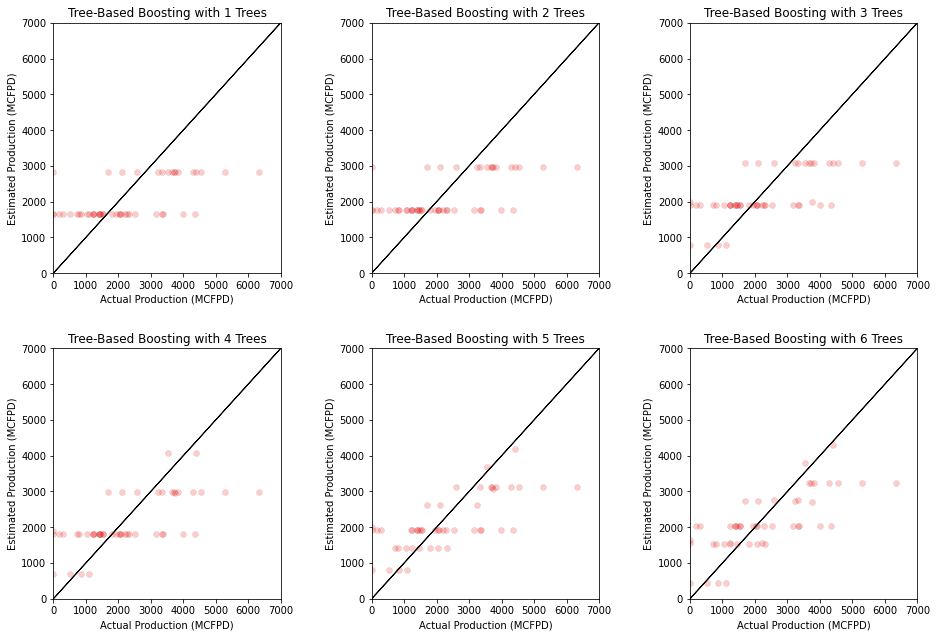

In [121]:
index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    plt.subplot(2,3,index)
    check_model(boosting_models[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Tree-Based Boosting with ' + str(int(num_tree)) + ' Trees')
    print(str(index)+ ', ', end =" ") 
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Of course with a single tree we do quite poorly, but by the time we get to 6 stump trees we are explaining 78% of the variance, not bad for quite a simple model.

#### Time to Build More Trees

Now let's demonstrate the result of utlizing many more trees in our tree-based boosting model.

* we will still work with simple decision stumps, don't worry we will add more later

Complete of 6:  1,  2,  3,  4,  5,  6,  

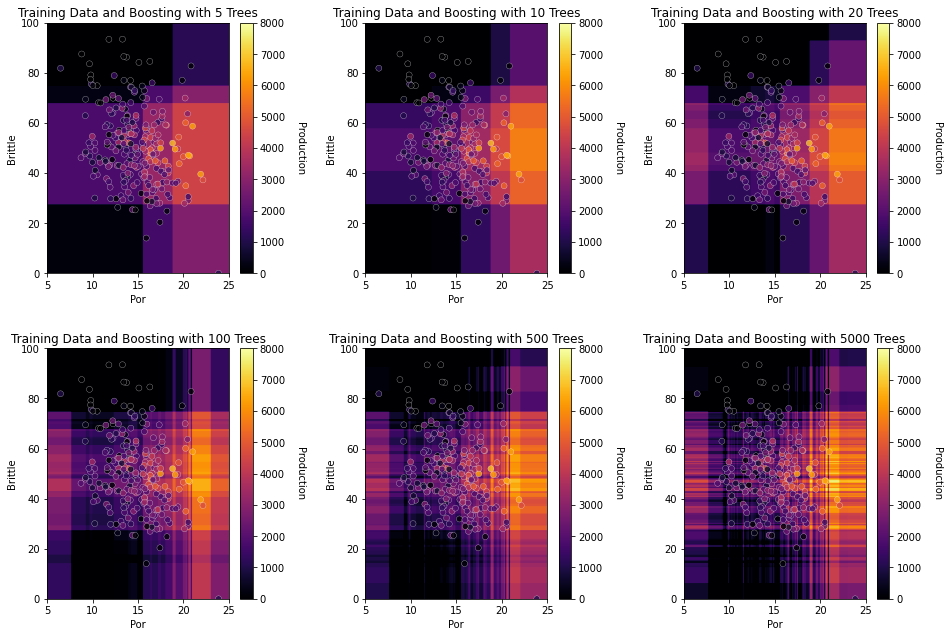

In [122]:
import warnings
warnings.filterwarnings('ignore')                           # suppress warnings
                 
params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 1,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}
    
num_trees = [5,10,20,100,500,5000]                          # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = predictors, y = response)
    score.append(boosting_models[index-1].score(X = predictors_test, y = response_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Boosting with ' + str(int(num_tree)) + ' Trees'))
    print(str(index)+ ', ', end =" ") 
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

See the plaid pattern? It is due to the use of decision stumps, and:

* an additive model
* all models contribute to all predictions

See the blank spots

* that our model predicting with negative values, the additive model may extrapolate outside the data range

Let's cross validate with our testing data to see how our model has improved with more trees.

Complete of 6:
  1,  Mean Squared Error on Training =  1901624.62 , Variance Explained = 0.46 Cor = 0.65
2,  Mean Squared Error on Training =  1561874.65 , Variance Explained = 0.57 Cor = 0.73
3,  Mean Squared Error on Training =  1532395.68 , Variance Explained = 0.56 Cor = 0.73
4,  Mean Squared Error on Training =  1453592.87 , Variance Explained = 0.58 Cor = 0.75
5,  Mean Squared Error on Training =  1544374.99 , Variance Explained = 0.55 Cor = 0.73
6,  Mean Squared Error on Training =  1947988.86 , Variance Explained = 0.42 Cor = 0.64


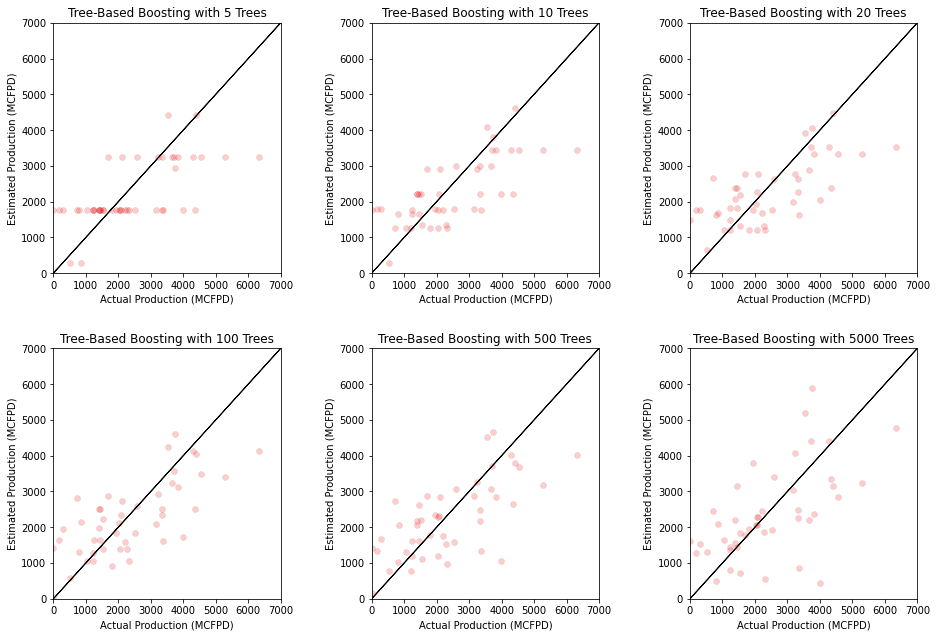

In [123]:
index = 1
print('Complete of ' + str(len(num_trees)) + ':\n ', end =" "); 
for num_tree in num_trees:                                  # loop over number of trees
    plt.subplot(2,3,index)
    print(str(index)+ ', ', end =" ")
    check_model(boosting_models[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Tree-Based Boosting with ' + str(int(num_tree)) + ' Trees')
    #print(str(index)+ ', ', end =" ") 
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Around 20 trees we get our best performance and then we start to degrade, we are likely starting to overfit the training data.

#### Going Beyond Decision Stumps

As state before with decision stumps we prevent interactions between features.

Let's extend to tree depth of 2

* two nested decisions resulting in 4 terminal nodes

We will repeat the previous model run with $1,\ldots,6$ trees for comparison and ease of visualization.

Complete of 6:  1,  2,  3,  4,  5,  6,  

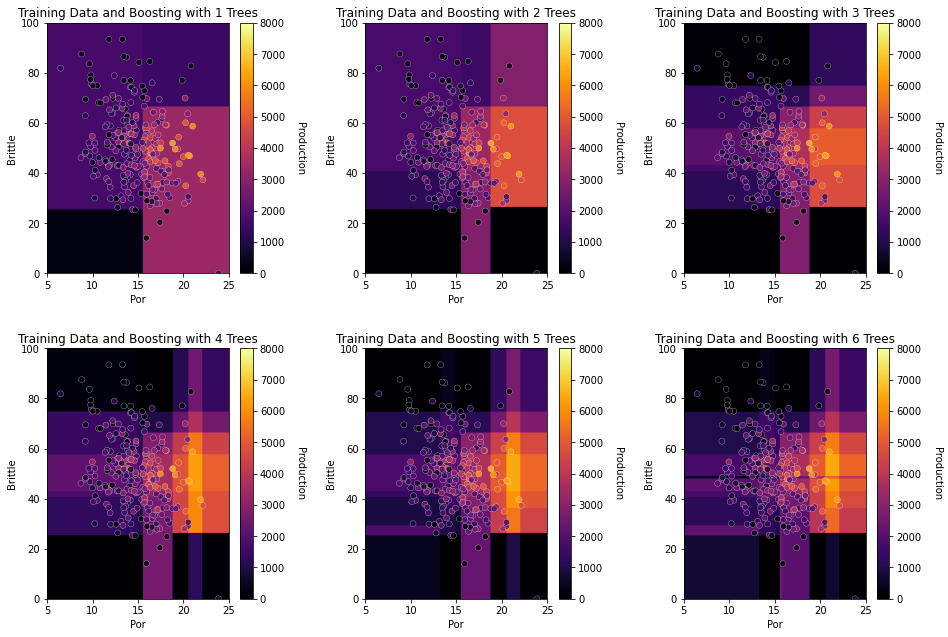

In [124]:
params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

num_trees = np.linspace(1,6,6)
boosting_models = []; score = []; pred = []

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = predictors, y = response)
    score.append(boosting_models[index-1].score(X = predictors_test, y = response_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Boosting with ' + str(int(num_tree)) + ' Trees'))
    print(str(index)+ ', ', end =" ") 
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

We have much more flexibility now.  

* with one tree we have 4 terminal nodes (regions)

* with only 6 trees we are capturing some complicate features

Let's increase the tree depth one more time and once again repeat with models of $1,\ldots,6$ trees

Complete of 6:  1,  2,  3,  4,  5,  6,  

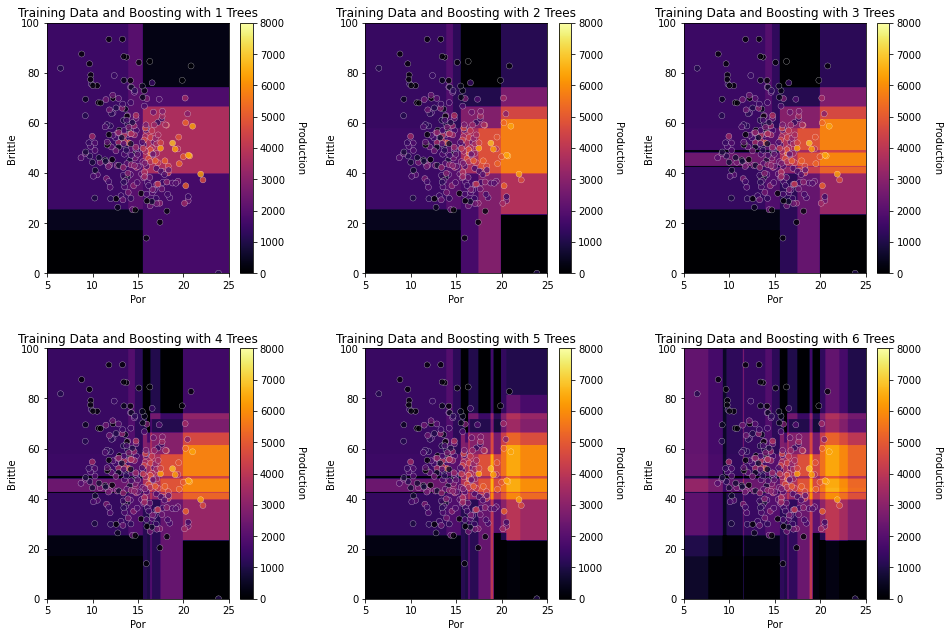

In [125]:
params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 3,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}
                                    
num_trees = np.linspace(1,6,6)
boosting_models = []; score = []; pred = []

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = predictors, y = response)
    score.append(boosting_models[index-1].score(X = predictors_test, y = response_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Boosting with ' + str(int(num_tree)) + ' Trees'))
    print(str(index)+ ', ', end =" ") 
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

One more time, it is common to use trees with depths of 4-8, so let's try 5.

Complete of 6:  1,  2,  3,  4,  5,  6,  

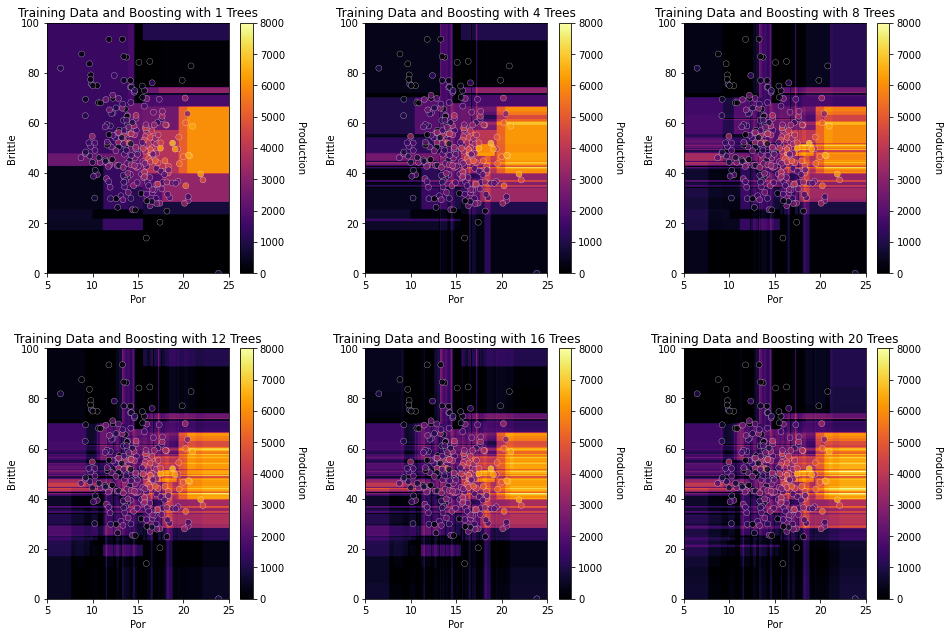

In [126]:
params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 5,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}
                                           
num_trees = np.linspace(1,20,6)
boosting_models = []; score = []; pred = []

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = predictors, y = response)
    score.append(boosting_models[index-1].score(X = predictors_test, y = response_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Boosting with ' + str(int(num_tree)) + ' Trees'))
    print(str(index)+ ', ', end =" ") 
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

With only 6 trees we are now fitting the training data quite well.  Let's cross validate the model with testing data.

Complete of 6:
 1,  Mean Squared Error on Training =  1188729.04 , Variance Explained = 0.67 Cor = 0.8
2,  Mean Squared Error on Training =  1491275.93 , Variance Explained = 0.57 Cor = 0.74
3,  Mean Squared Error on Training =  1635952.3 , Variance Explained = 0.53 Cor = 0.71
4,  Mean Squared Error on Training =  1713397.74 , Variance Explained = 0.5 Cor = 0.69
5,  Mean Squared Error on Training =  1777355.57 , Variance Explained = 0.48 Cor = 0.68
6,  Mean Squared Error on Training =  1865758.57 , Variance Explained = 0.45 Cor = 0.66


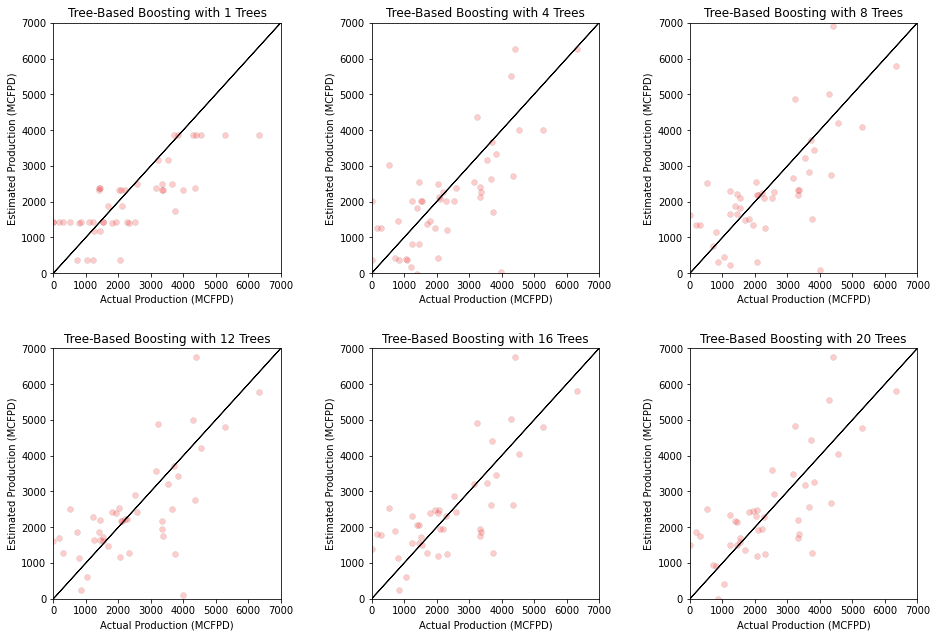

In [127]:
index = 1
print('Complete of ' + str(len(num_trees)) + ':\n', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    plt.subplot(2,3,index)
    print(str(index)+ ', ', end =" ") 
    check_model(boosting_models[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Tree-Based Boosting with ' + str(int(num_tree)) + ' Trees')
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

With a max tree depth of 5 our model performance peaks early and the addition of more trees has no impact.

* of course this is not a thorough analysis

Let's try something more thorough

* we will cross validate models with $1,\ldots,100$ trees with max tree depths of $1, 2, 3, 10$.

Complete of 100:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,  100,  

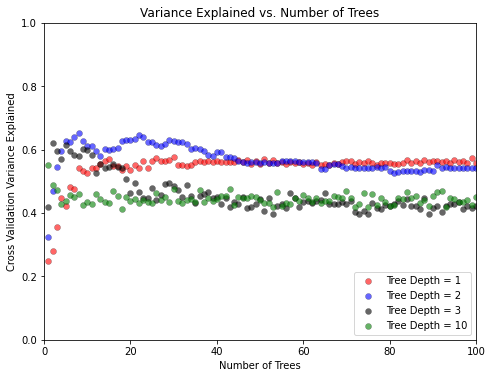

In [128]:
num_trees = np.linspace(1,100,100)
max_features = 1
boosting_models1 = []; boosting_models2 = []; boosting_models3 = []; boosting_models4 = []
score1 = []; score2 = []; score3 = []; score4 = [] 

params1 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 1,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params2 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params3 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 3,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params4 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 10,                                        # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees in our random forest
    boosting_models1.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params1))
    boosting_models1[index-1].fit(X = predictors, y = response)
    score1.append(boosting_models1[index-1].score(X = predictors_test, y = response_test))
    
    boosting_models2.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params2))
    boosting_models2[index-1].fit(X = predictors, y = response)
    score2.append(boosting_models2[index-1].score(X = predictors_test, y = response_test)) 
    
    boosting_models3.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params3))
    boosting_models3[index-1].fit(X = predictors, y = response)
    score3.append(boosting_models3[index-1].score(X = predictors_test, y = response_test)) 
    
    boosting_models4.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params4))
    boosting_models4[index-1].fit(X = predictors, y = response)
    score4.append(boosting_models4[index-1].score(X = predictors_test, y = response_test)) 

    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplot(111)                                            # plot jackknife results for all cases
plt.scatter(num_trees,score1,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 1")
plt.scatter(num_trees,score2,s=None, c='blue', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 2")
plt.scatter(num_trees,score3,s=None, c='black', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 3")
plt.scatter(num_trees,score4,s=None, c='green', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Tree Depth = 10")

plt.title('Variance Explained vs. Number of Trees'); plt.xlabel('Number of Trees'); plt.ylabel('Cross Validation Variance Explained')
plt.xlim(0,100); plt.ylim(0,1.0); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()

That's interesting:

* with increasing tree depths our model may improve

* more tree depth requires fewer trees for improved accruacy

* with tree depths of 2 and 3 the models behave the same and after 10-15 trees level off, they are resistent to overfit

* with tree depth of 10, the number of trees has no impact of model performance

Recall the response feature is non-linear, but smooth over the predictor feature space

#### Gradient Descent Hyperparameters

The learning rate scales the additive impact of each additive tree to the overall model prediction.

* lower learning rate will slow the convergence to a solution

* lower learning rate will help us not skip over an optimum solution

We won't spend much time on this, but let's just try changing the learning rate.

Complete of 100:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,  100,  

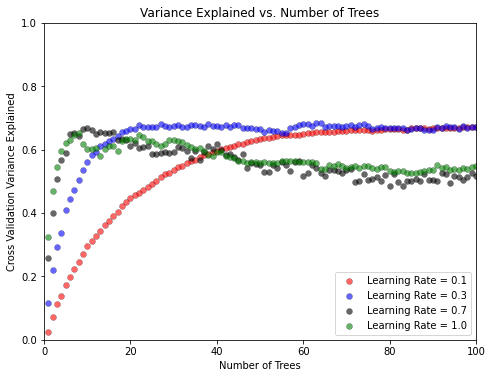

In [129]:
num_trees = np.linspace(1,100,100)
max_features = 1
boosting_models1 = []; boosting_models2 = []; boosting_models3 = []; boosting_models4 = []
score1 = []; score2 = []; score3 = []; score4 = [] 

params1 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params2 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.3,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params3 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.7,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params4 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 1.0,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees in our random forest
    boosting_models1.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params1))
    boosting_models1[index-1].fit(X = predictors, y = response)
    score1.append(boosting_models1[index-1].score(X = predictors_test, y = response_test))
    
    boosting_models2.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params2))
    boosting_models2[index-1].fit(X = predictors, y = response)
    score2.append(boosting_models2[index-1].score(X = predictors_test, y = response_test)) 
    
    boosting_models3.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params3))
    boosting_models3[index-1].fit(X = predictors, y = response)
    score3.append(boosting_models3[index-1].score(X = predictors_test, y = response_test)) 
    
    boosting_models4.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params4))
    boosting_models4[index-1].fit(X = predictors, y = response)
    score4.append(boosting_models4[index-1].score(X = predictors_test, y = response_test)) 

    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplot(111)                                            # plot jackknife results for all cases                                        
plt.scatter(num_trees,score1,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 0.1")
plt.scatter(num_trees,score2,s=None, c='blue', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 0.3")
plt.scatter(num_trees,score3,s=None, c='black', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 0.7")
plt.scatter(num_trees,score4,s=None, c='green', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 1.0")

plt.title('Variance Explained vs. Number of Trees'); plt.xlabel('Number of Trees'); plt.ylabel('Cross Validation Variance Explained')
plt.xlim(0,100); plt.ylim(0,1.0); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()

Once again, a very interesting result.

* decreasing learning rate, requires more trees to reach the variance explained plateau 

* decrease in learning rate of 1.0 actually improves the ultimate model performance.

There are so many more exercised and tests that one could attempt to gain experience with tree-based gradient boosting. I'll end here for brevity, but I invite you to continue. Consider, on your own modeling in higher dimension and with other data sets or with classification. I hope you found this tutorial useful. I'm always happy to discuss geostatistics, statistical modeling, uncertainty modeling and machine learning,

If you struggled with the basic Python used here check out my other basic demonstrations for DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin